<a href="https://colab.research.google.com/github/antipovaya/probability-theory-and-mathematical-statistics/blob/main/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F_%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

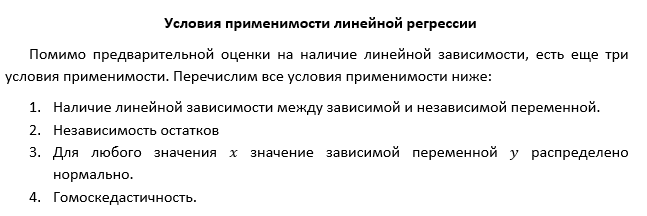

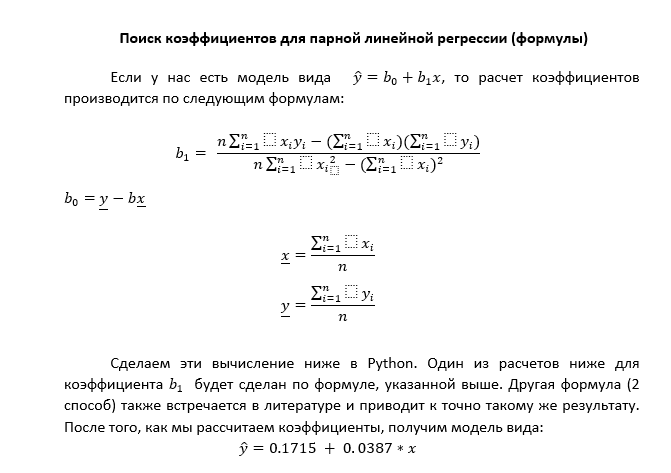

In [ ]:
import numpy as np


s = np.array([27, 37, 42, 48, 57, 56, 77, 80])
p = np.array([1.2, 1.6, 1.8, 1.8, 2.5, 2.6, 3, 3.3])
n = 8
b1 = (n * np.sum(p * s) - np.sum(s) * np.sum(p)) / (n * np.sum(s ** 2) - np.sum(s)**2)
print(b1)
b0 = np.mean(p) - b1 * np.mean(s)
print(b0)

# или 2-й способ чрез средние:
b1 = (np.mean(p * s) - np.mean(s) * np.mean(p)) / (np.mean(s ** 2) - np.mean(s)**2)
print(b1)

y_pred = b0 + b1 * s
print(y_pred)

0.03874584717607981
0.17147009966776983
0.03874584717607981
[1.21760797 1.60506645 1.79879568 2.03127076 2.37998339 2.34123754
 3.15490033 3.27113787]


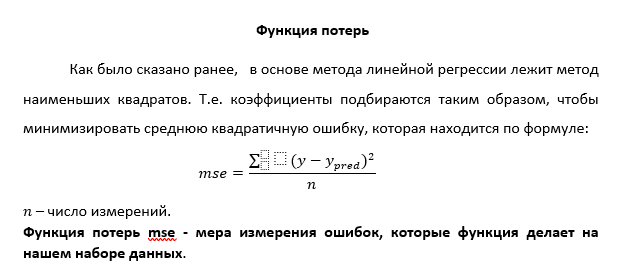

**MSE** - это среднее значение квадратов разностей между фактическими и предсказанными значениями.

**Интерпретация:**

Чем меньше MSE, тем лучше модель

MSE измеряется в квадратах единиц целевой переменной

Чувствителен к выбросам (большие ошибки сильно влияют на результат)

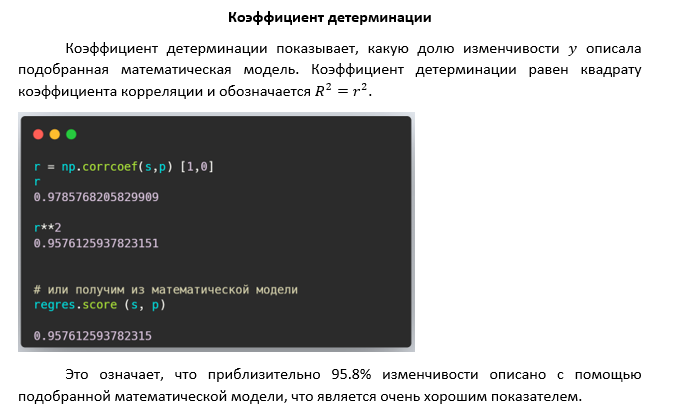

In [ ]:
r = np.corrcoef(s, p)
print(r**2)

[[1.         0.95761259]
 [0.95761259 1.        ]]


**Коэффициент детерминации R²**  
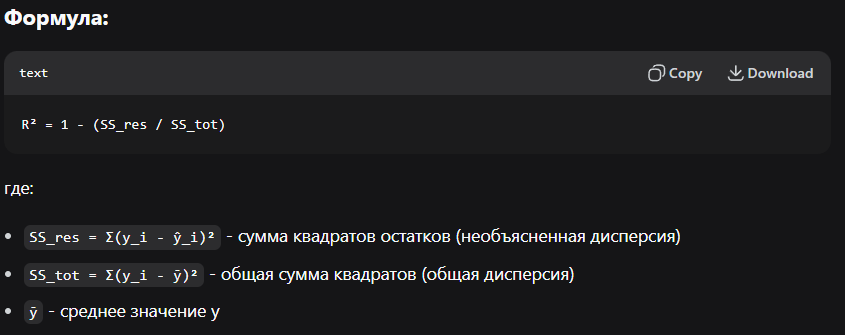

**Интерпретация:**

0 ≤ R² ≤ 1

R² = 1: идеальное объяснение (все точки на линии)

R² = 0: модель не лучше, чем предсказание средним значением

R² < 0: модель хуже, чем предсказание средним значением

**Функция потерь MSE:**

* Прямая мера ошибки - показывает, насколько в среднем ошибается модель

* Используется при обучении - алгоритм оптимизирует параметры, минимизируя MSE

* Чувствителена к выбросам - большие ошибки сильно влияют на значение


**Коэффициент детерминации R²:**

* Относительная мера качества - показывает долю объясненной дисперсии

* Легко интерпретируется - от 0% до 100% объясненной вариации

* Позволяет сравнивать модели - даже на разных наборах данных


**Взаимосвязь:**

* Хорошая модель имеет низкий MSE и высокий R²

* Можно иметь низкий R², но приемлемый MSE (если данные очень шумные)

* Можно иметь высокий R², но высокий MSE (если масштаб данных большой)


На практике обе метрики важны: MSE показывает абсолютную величину ошибок, а R² - относительное качество модели по сравнению с простым предсказанием средним значением.

In [ ]:
# Шаг 1: Расчет MSE вручную
mse = ((p - y_pred)**2).sum() / n
print(f"MSE (ручной расчет): {mse:.4f}")

MSE (ручной расчет): 0.0200


In [ ]:
# Шаг 2: Расчет R² вручную
ss_res = np.sum((p - y_pred) ** 2)  # необъясненная дисперсия
ss_tot = np.sum((p - np.mean(p)) ** 2)  # общая дисперсия
r_squared_manual = 1 - (ss_res / ss_tot)
print(f"R² (ручной расчет): {r_squared_manual:.4f}")

R² (ручной расчет): 0.9576


In [ ]:
# Сравнение с встроенными функциями
from sklearn.metrics import mean_squared_error, r2_score

mse_sklearn = mean_squared_error(p, y_pred)
r2_sklearn = r2_score(p, y_pred)

print(f"\nСравнение с sklearn:")
print(f"MSE: ручной = {mse:.4f}, sklearn = {mse_sklearn:.4f}")
print(f"R²: ручной = {r_squared_manual:.4f}, sklearn = {r2_sklearn:.4f}")

# Шаг 5: Более подробный анализ
print(f"\nДетальный анализ:")
print(f"Сумма квадратов остатков (SS_res) = {ss_res:.4f}")
print(f"Общая сумма квадратов (SS_tot) = {ss_tot:.4f}")
print(f"Объясненная сумма квадратов (SS_exp) = {ss_tot - ss_res:.4f}")

# Шаг 6: Интерпретация результатов
print(f"\nИнтерпретация:")
print(f"MSE = {mse:.4f} - средний квадрат ошибки предсказания")
print(f"RMSE = {np.sqrt(mse):.4f} - средняя ошибка предсказания в единицах Y")
print(f"R² = {r_squared_manual:.4f} - модель объясняет {r_squared_manual*100:.1f}% дисперсии Y")



Сравнение с sklearn:
MSE: ручной = 0.0200, sklearn = 0.0200
R²: ручной = 0.9576, sklearn = 0.9576

Детальный анализ:
Сумма квадратов остатков (SS_res) = 0.1600
Общая сумма квадратов (SS_tot) = 3.7750
Объясненная сумма квадратов (SS_exp) = 3.6150

Интерпретация:
MSE = 0.0200 - средний квадрат ошибки предсказания
RMSE = 0.1414 - средняя ошибка предсказания в единицах Y
R² = 0.9576 - модель объясняет 95.8% дисперсии Y


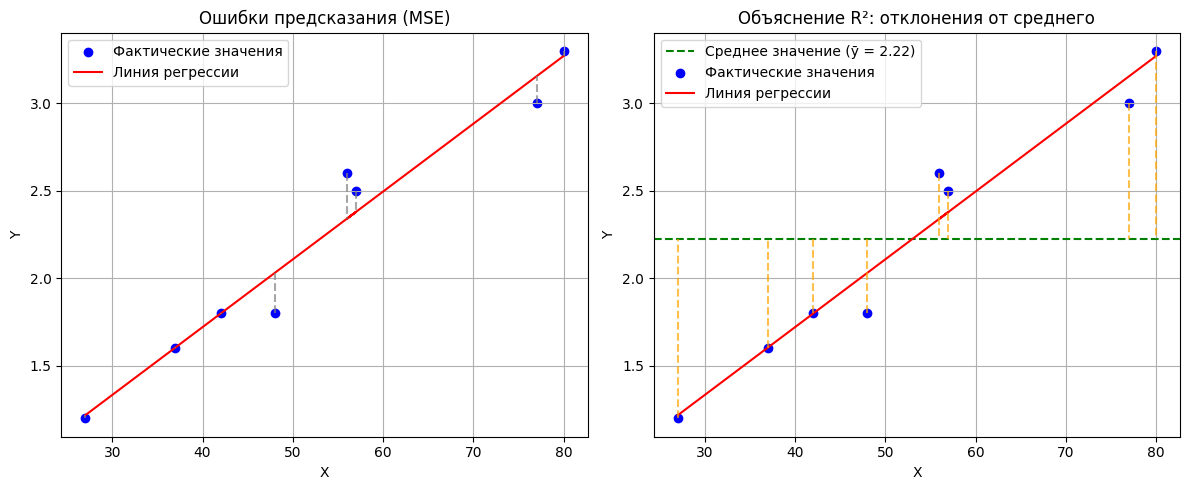

In [ ]:
# Шаг 3: Визуализация для понимания MSE и R²
plt.figure(figsize=(12, 5))

# График 1: Фактические vs Предсказанные значения с ошибками
plt.subplot(1, 2, 1)
plt.scatter(s, p, color='blue', label='Фактические значения')
plt.plot(s, y_pred, color='red', label='Линия регрессии')

# Показываем ошибки (расстояния от точек до линии)
for i in range(n):
    plt.plot([s[i], s[i]], [p[i], y_pred[i]], 'gray', linestyle='--', alpha=0.7)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ошибки предсказания (MSE)')
plt.legend()
plt.grid(True)

# График 2: Объяснение R²
plt.subplot(1, 2, 2)
mean_y = np.mean(p)
plt.axhline(y=mean_y, color='green', linestyle='--', label=f'Среднее значение (ȳ = {mean_y:.2f})')
plt.scatter(s, p, color='blue', label='Фактические значения')
plt.plot(s, y_pred, color='red', label='Линия регрессии')

# Показываем отклонения от среднего
for i in range(n):
    plt.plot([s[i], s[i]], [p[i], mean_y], 'orange', linestyle='--', alpha=0.7)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Объяснение R²: отклонения от среднего')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

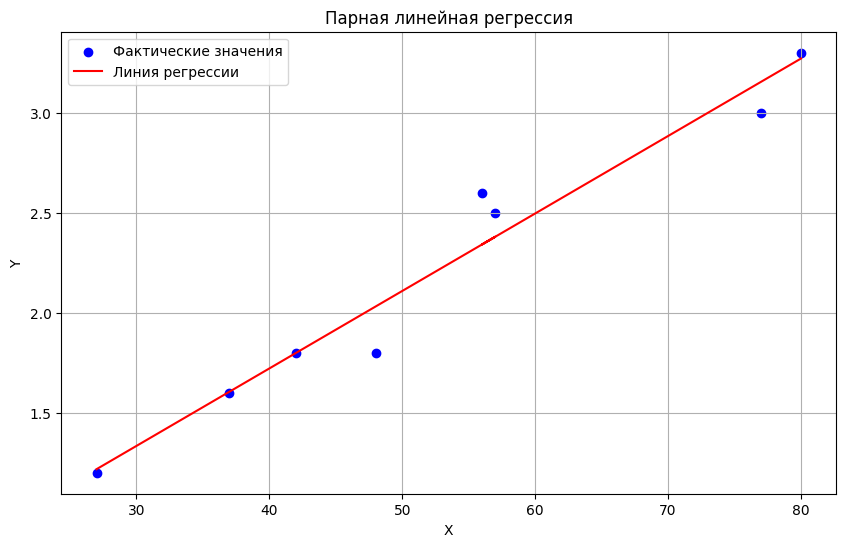

In [ ]:
import matplotlib.pyplot as plt


# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(s, p, color='blue', label='Фактические значения')
plt.plot(s, y_pred, color='red', label='Линия регрессии')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Парная линейная регрессия')
plt.legend()
plt.grid(True)
plt.show()

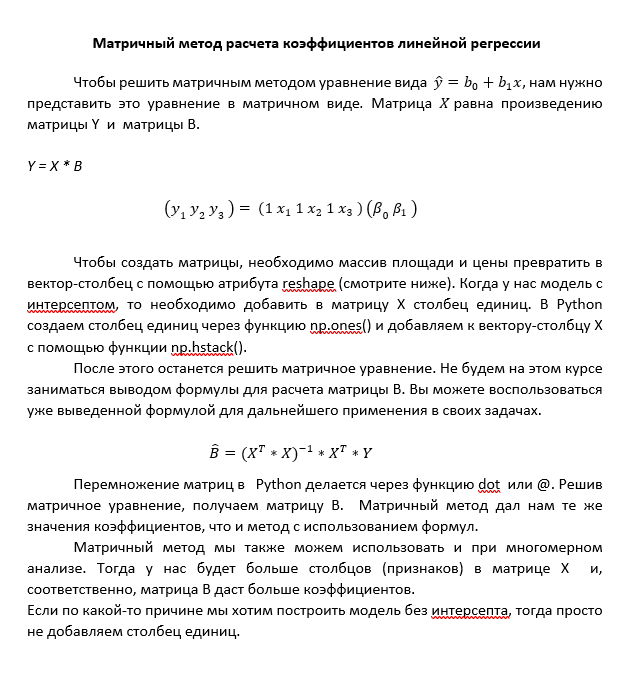

In [ ]:
import numpy as np

# Исходные данные
s = np.array([27, 37, 42, 48, 57, 56, 77, 80])
p = np.array([1.2, 1.6, 1.8, 1.8, 2.5, 2.6, 3, 3.3])


# Подготовка данных для регрессии
x = s.reshape((8, 1))
y = p.reshape((8, 1))

# Что происходит:
# reshape((8, 1)) преобразует одномерные массивы в двумерные формы (8 строк × 1 столбец)
# Это необходимо, потому что методы линейной алгебры в NumPy работают с двумерными массивами

# Зачем:
# Преобразование необходимо для последующих матричных операций
# Машинное обучение в sklearn и других библиотеках также требует данные в таком формате


# Добавление столбца единиц для коэффициента intercept
X = np.hstack([np.ones((8, 1)), x])

# Что происходит:
# np.ones((8, 1)) создает матрицу из единиц размером 8×1
# np.hstack() объединяет матрицы по горизонтали (по столбцам)

# Зачем:
# Столбец из единиц нужен для расчета свободного члена (intercept) в уравнении регрессии
# Без этого столбца мы могли бы рассчитать только угловой коэффициент (slope)
# Уравнение регрессии имеет вид: y = b₀·1 + b₁·x, где b₀ - intercept



# Вычисление коэффициентов регрессии по формуле (X^T * X)^(-1) * X^T * y
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T @ y)

# Разберем по частям:
# a) X.T - транспонирование матрицы
# Меняет строки и столбцы местами
# Если X размером 8×2, то X.T будет размером 2×8

# b) np.dot(X.T, X) - матричное умножение
# Умножает транспонированную матрицу на исходную
# Результат: квадратная матрица 2×2

# c) np.linalg.inv() - обращение матрицы
# Находит обратную матрицу для (X.T × X)
# Это аналог деления в матричной алгебре

# d) X.T @ y - матричное умножение
# Умножает транспонированную матрицу X на вектор y
# Эквивалентно np.dot(X.T, y)

# e) np.dot() - финальное умножение
# Умножает обратную матрицу на результат предыдущего умножения
# Получаем вектор коэффициентов B = [b₀, b₁]
print(B)
print("Коэффициенты регрессии:")
print(f"Intercept (b0): {B[0][0]:.6f}")
print(f"Slope (b1): {B[1][0]:.6f}")

[[0.1714701 ]
 [0.03874585]]
Коэффициенты регрессии:
Intercept (b0): 0.171470
Slope (b1): 0.038746


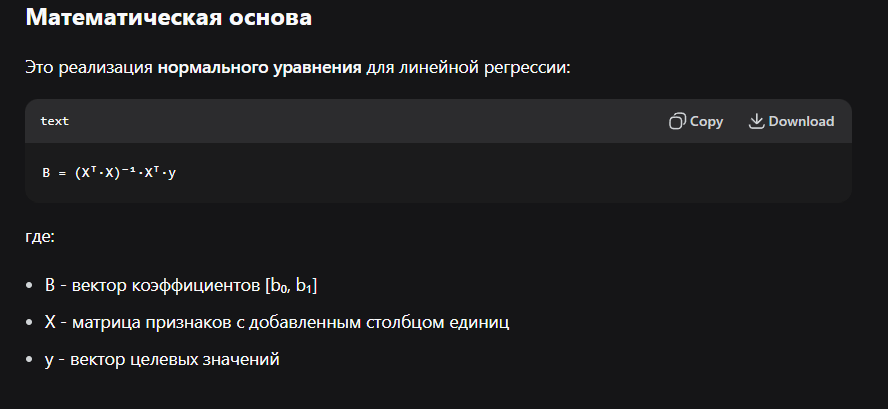

**Альтернативная запись**


Тот же результат можно получить с помощью встроенных функций:

In [ ]:
# Способ 1: С использованием псевдообратной матрицы
B = np.linalg.pinv(X) @ y
print(B)
# Способ 2: С использованием метода наименьших квадратов
B = np.linalg.lstsq(X, y, rcond=None)[0]
print(B)
# Способ 3: С использованием sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)  # intercept уже в матрице X
model.fit(X, y)
B = model.coef_.reshape(-1, 1)
print(B)

[[0.1714701 ]
 [0.03874585]]
[[0.1714701 ]
 [0.03874585]]
[[0.1714701 ]
 [0.03874585]]


Подробное объяснение альтернативных способов расчета линейной регрессии

Разберем каждый из трех предложенных способов расчета коэффициентов линейной регрессии:

**Способ 1: Псевдообратная матрица Мура-Пенроуза**

In [ ]:
B = np.linalg.pinv(X) @ y

**Что происходит:**

np.linalg.pinv(X) - вычисляет псевдообратную матрицу Мура-Пенроуза для матрицы X

@ - оператор матричного умножения (эквивалентен np.dot())

Умножаем псевдообратную матрицу на вектор y

**Зачем это нужно:**

Псевдообратная матрица обобщает понятие обратной матрицы на случай неквадратных или вырожденных матриц

Решает систему линейных уравнений X·B = y методом наименьших квадратов

Более устойчива к вырожденным случаям, чем прямое обращение матрицы (Xᵀ·X)⁻¹

Автоматически обрабатывает случаи, когда матрица X не имеет полного ранга

**Математическая основа:**

In [ ]:
# B = X⁺·y
# где X⁺ - псевдообратная матрица Мура-Пенроуза

**Способ 2: Метод наименьших квадратов**

In [ ]:
B = np.linalg.lstsq(X, y, rcond=None)[0]

**Что происходит:**

np.linalg.lstsq() - решает систему линейных уравнений методом наименьших квадратов

rcond=None - параметр, определяющий отсечение для малых сингулярных чисел

[0] - функция возвращает кортеж, где первый элемент - решение системы


**Зачем это нужно:**

* Специализированная функция для решения задач наименьших квадратов

* Автоматически выбирает оптимальный алгоритм (SVD, QR-разложение и т.д.)

* Обрабатывает вырожденные случаи и переопределенные системы

* Возвращает дополнительную информацию (остатки, ранг матрицы, сингулярные значения)

**Возвращаемые значения:**
**Функция lstsq возвращает кортеж из четырех элементов:**

* Решение системы (коэффициенты регрессии)

* Сумма квадратов остатков

* Ранг матрицы X

* Сингулярные значения матрицы X

Спо**соб 3: Использование scikit-learn**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
B = model.coef_.reshape(-1, 1)

Что происходит:

LinearRegression(fit_intercept=False) - создание объекта линейной регрессии с отключенным автоматическим добавлением intercept

* model.fit(X, y) - обучение модели на данных

* model.coef_ - получение коэффициентов регрессии

* reshape(-1, 1) - преобразование вектора коэффициентов в столбец

**Зачем это нужно:**

* Использование мощного и оптимизированного фреймворка машинного обучения

* Автоматическая обработка различных случаев и оптимизация вычислений

* Возможность использования дополнительных функций (регуляризация, кросс-валидация и т.д.)

* Единообразный API для различных алгоритмов машинного обучения

**Особенности:**

* Параметр fit_intercept=False указывает, что не нужно добавлять столбец единиц, так как мы уже добавили его вручную

* По умолчанию fit_intercept=True, и sklearn автоматически добавит столбец единиц

* Метод fit() использует различные оптимизированные алгоритмы в зависимости от размера данных

**Сравнение методов**


Точность: Все три метода дают одинаковый результат с точностью до численных погрешностей

**Производительность:**

* pinv и lstsq используют схожие алгоритмы (обычно на основе SVD)

* sklearn может использовать различные оптимизированные алгоритмы

**Устойчивость:**

* pinv и lstsq более устойчивы к вырожденным случаям

* sklearn предоставляет дополнительные возможности обработки особых случаев

**Удобство:**


* sklearn предоставляет интерфейс для работы с моделью (предсказания, оценка качества и т.д.)

* NumPy функции более низкоуровневые, но дают полный контроль над вычислениями

**Рекомендации по использованию:**

* Для быстрых вычислений и исследований: scikit-learn

* Для точного контроля над вычислениями: numpy.linalg.lstsq

* Для специальных случаев или образовательных целей: ручная реализация с pinv

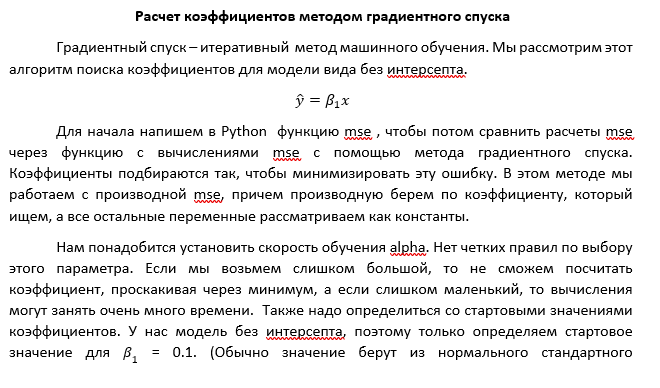

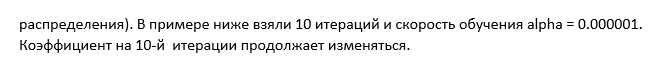

Начальное значение B1 = 0.1
Начальная MSE = 10.605000000000004

Первые 10 итераций градиентного спуска:
Итерация 1: B1 = 0.099637175000000, MSE = 10.473767
Итерация 2: B1 = 0.099276606771500, MSE = 10.344162
Итерация 3: B1 = 0.098918281277381, MSE = 10.216164
Итерация 4: B1 = 0.098562184567836, MSE = 10.089754
Итерация 5: B1 = 0.098208302779824, MSE = 9.964911
Итерация 6: B1 = 0.097856622136534, MSE = 9.841616
Итерация 7: B1 = 0.097507128946844, MSE = 9.719851
Итерация 8: B1 = 0.097159809604795, MSE = 9.599595
Итерация 9: B1 = 0.096814650589053, MSE = 9.480831
Итерация 10: B1 = 0.096471638462389, MSE = 9.363540

Дополнительные 3000 итераций градиентного спуска:
Итерация 0: B1 = 0.099637175000000, MSE = 10.473767425934748
Итерация 500: B1 = 0.044228497074525, MSE = 0.043236726005615
Итерация 1000: B1 = 0.041781102969909, MSE = 0.022886996112286
Итерация 1500: B1 = 0.041673001890303, MSE = 0.022847294248724
Итерация 2000: B1 = 0.041668227079662, MSE = 0.022847216791285
Итерация 2500: B1 

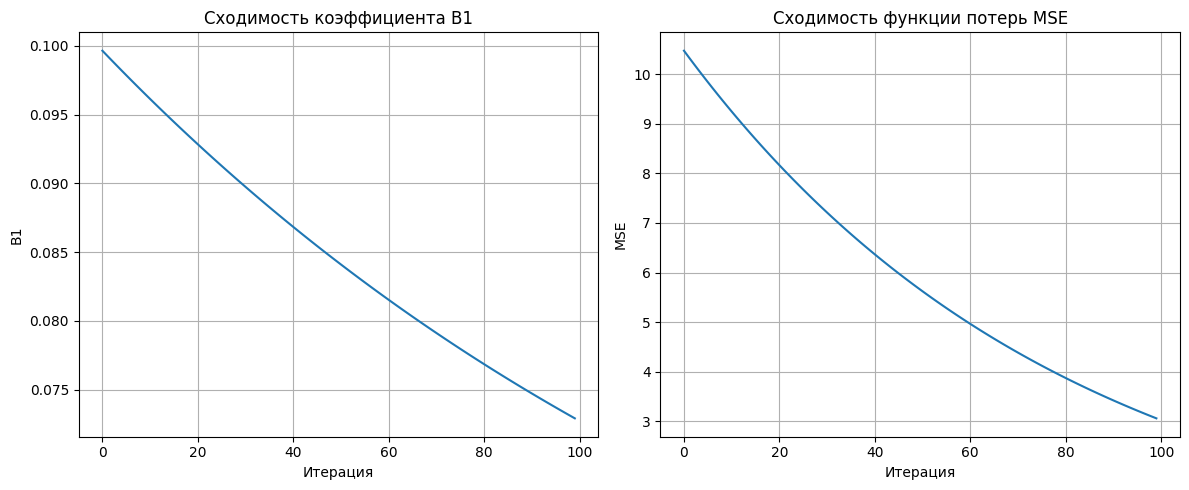

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Исходные данные
x = np.array([27, 37, 42, 48, 57, 56, 77, 80])
y = np.array([1.2, 1.6, 1.8, 1.8, 2.5, 2.6, 3, 3.3])
n = len(x)  # количество наблюдений

# Функция для вычисления среднеквадратичной ошибки (MSE)
def mse(B1, y=y, x=x, n=n):
    """
    Вычисляет среднеквадратичную ошибку для модели y = B1 * x

    Параметры:
    B1 - угловой коэффициент
    y - массив фактических значений
    x - массив признаков
    n - количество наблюдений

    Возвращает:
    MSE - средняя квадратичная ошибка
    """
    return np.sum((B1 * x - y) ** 2) / n

# Шаг 1: Инициализация параметров
alpha = 1e-6  # скорость обучения (learning rate)
B1 = 0.1      # начальное значение коэффициента

print("Начальное значение B1 =", B1)
print("Начальная MSE =", mse(B1))

# Шаг 2: Первые 10 итераций градиентного спуска
print("\nПервые 10 итераций градиентного спуска:")
for i in range(10):
    # Вычисление градиента функции потерь
    gradient = (2/n) * np.sum((B1 * x - y) * x)

    # Обновление коэффициента B1 (движение в направлении, противоположном градиенту)
    B1 -= alpha * gradient

    print(f'Итерация {i+1}: B1 = {B1:.15f}, MSE = {mse(B1):.6f}')

# Шаг 3: Продолжение градиентного спуска (3000 итераций)
print("\nДополнительные 3000 итераций градиентного спуска:")
B1 = 0.1  # сбрасываем значение для демонстрации

for i in range(3000):
    # Вычисление градиента
    gradient = (2/n) * np.sum((B1 * x - y) * x)

    # Обновление коэффициента
    B1 -= alpha * gradient

    # Вывод информации каждые 500 итераций
    if i % 500 == 0:
        print(f'Итерация {i}: B1 = {B1:.15f}, MSE = {mse(B1):.15f}')

# Шаг 4: Проверка результата
print(f"\nФинальное значение B1 = {B1:.15f}")
print(f"MSE для B1 = {B1:.6f}: {mse(B1):.15f}")

# Сравнение с точным решением (через нормальное уравнение)
# Для модели y = B1 * x (без свободного члена)
X = x.reshape(-1, 1)
B1_exact = np.linalg.inv(X.T @ X) @ X.T @ y
print(f"\nТочное решение (нормальное уравнение): B1 = {B1_exact[0]:.15f}")
print(f"MSE для точного решения: {mse(B1_exact[0]):.15f}")

# Визуализация процесса сходимости
B1_values = []
mse_values = []
B1_current = 0.1

for i in range(100):
    gradient = (2/n) * np.sum((B1_current * x - y) * x)
    B1_current -= alpha * gradient
    B1_values.append(B1_current)
    mse_values.append(mse(B1_current))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(B1_values)
plt.xlabel('Итерация')
plt.ylabel('B1')
plt.title('Сходимость коэффициента B1')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(mse_values)
plt.xlabel('Итерация')
plt.ylabel('MSE')
plt.title('Сходимость функции потерь MSE')
plt.grid(True)

plt.tight_layout()
plt.show()

**Пояснение каждого шага:**
1. Исходные данные

x - площади квартир (признак)

y - цены квартир (целевая переменная)

n - количество наблюдений (8)

2. Функция MSE

mse(B1) вычисляет среднеквадратичную ошибку для модели y = B1 * x

Формула: MSE = (1/n) * Σ(B1*x_i - y_i)²

3. Инициализация параметров

alpha = 1e-6 - скорость обучения (шаг градиентного спуска)

B1 = 0.1 - начальное значение коэффициента

4. Градиентный спуск

Градиент MSE: (2/n) * Σ((B1*x_i - y_i) * x_i)

Обновление коэффициента: B1 = B1 - alpha * gradient

На каждой итерации мы двигаемся в направлении, противоположном градиенту, чтобы минимизировать функцию потерь

5. Визуализация сходимости

Графики показывают, как значение коэффициента B1 и функция потерь MSE сходятся к оптимальным значениям

6. Сравнение с точным решением

Нормальное уравнение дает точное математическое решение

Градиентный спуск приближается к этому решению итеративно

Ключевые моменты:

Скорость обучения (alpha):

* Слишком большое значение может привести к расхождению

* Слишком маленькое значение замедляет сходимость

* В данном случае α = 1e-6 хорошо работает для этих данных

Количество итераций:

* Первые 10 итераций показывают быстрый начальный прогресс

* Для достижения высокой точности больше итераций

Сходимость:

* Градиентный спуск постепенно приближается к оптимальному решению

* MSE уменьшается с каждой итерацией

Практическое применение:

* Градиентный спуск используется, когда нормальное уравнение computationally expensive

* Особенно полезен для больших наборов данных и сложных моделей

Этот код демонстрирует основы градиентного спуска - одного из ключевых алгоритмов оптимизации в машинном обучении.

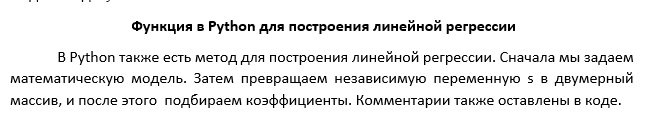

Массив s после преобразования:
[[27]
 [37]
 [42]
 [48]
 [57]
 [56]
 [77]
 [80]]

Свободный член (intercept): 0.171470
Коэффициент наклона (slope): 0.038746
Уравнение регрессии: price = 0.1715 + 0.0387*area

Предсказанные значения цены:
[1.21760797 1.60506645 1.79879568 2.03127076 2.37998339 2.34123754
 3.15490033 3.27113787]


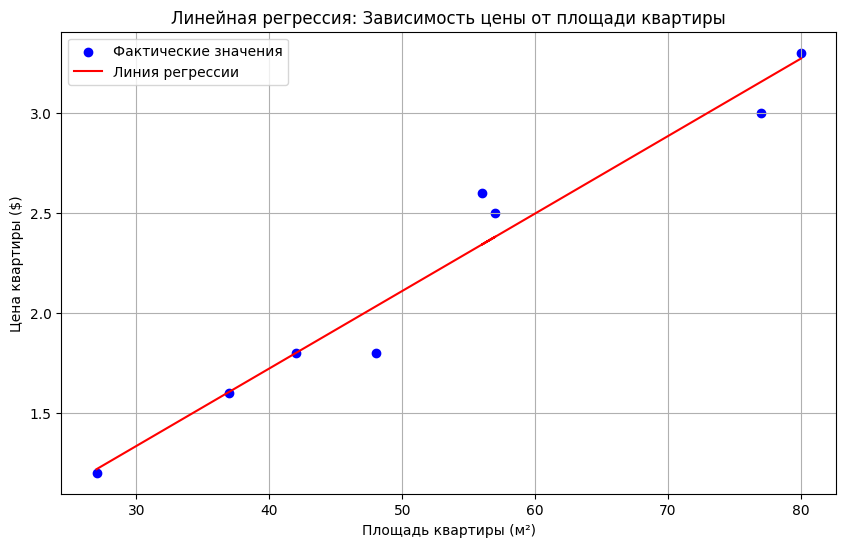


Сравнение реальных и предсказанных значений:
   Реальные  Предсказанные
0       1.2       1.217608
1       1.6       1.605066
2       1.8       1.798796
3       1.8       2.031271
4       2.5       2.379983
5       2.6       2.341238
6       3.0       3.154900
7       3.3       3.271138

Детальный анализ ошибок предсказания:
   Реальные  Предсказанные    Ошибка  Абсолютная ошибка  \
0       1.2       1.217608 -0.017608           0.017608   
1       1.6       1.605066 -0.005066           0.005066   
2       1.8       1.798796  0.001204           0.001204   
3       1.8       2.031271 -0.231271           0.231271   
4       2.5       2.379983  0.120017           0.120017   
5       2.6       2.341238  0.258762           0.258762   
6       3.0       3.154900 -0.154900           0.154900   
7       3.3       3.271138  0.028862           0.028862   

   Относительная ошибка (%)  
0                  1.467331  
1                  0.316653  
2                  0.066907  
3                 12

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Шаг 1: Подготовка данных
# Исходные данные о площади квартир и их цене
s = np.array([27, 37, 42, 48, 57, 56, 77, 80])  # площади квартир
p = np.array([1.2, 1.6, 1.8, 1.8, 2.5, 2.6, 3, 3.3])  # цены квартир

# Преобразуем массив s в двумерный (необходимо для scikit-learn)
s_reshaped = s.reshape(-1, 1)
print("Массив s после преобразования:")
print(s_reshaped)

# Шаг 2: Создание и обучение модели линейной регрессии
model = LinearRegression()  # создаем объект модели линейной регрессии
regres = model.fit(s_reshaped, p)  # обучаем модель на данных

# Шаг 3: Получение коэффициентов регрессии
intercept = regres.intercept_  # свободный член (intercept)
coef = regres.coef_[0]  # коэффициент наклона (slope)

print(f"\nСвободный член (intercept): {intercept:.6f}")
print(f"Коэффициент наклона (slope): {coef:.6f}")
print(f"Уравнение регрессии: price = {intercept:.4f} + {coef:.4f}*area")

# Шаг 4: Прогнозирование значений
y_pred = model.predict(s_reshaped)  # предсказываем цены для всех площадей
print("\nПредсказанные значения цены:")
print(y_pred)

# Шаг 5: Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(s, p, color='blue', label='Фактические значения')  # фактические точки
plt.plot(s, y_pred, color='red', label='Линия регрессии')  # линия регрессии
plt.xlabel('Площадь квартиры (м²)')
plt.ylabel('Цена квартиры ($)')
plt.title('Линейная регрессия: Зависимость цены от площади квартиры')
plt.legend()
plt.grid(True)
plt.show()

# Шаг 6: Создание DataFrame для сравнения фактических и предсказанных значений
df = pd.DataFrame({'Реальные': p, 'Предсказанные': y_pred})
print("\nСравнение реальных и предсказанных значений:")
print(df)

# Шаг 7: Дополнительный анализ - вычисление ошибок предсказания
df['Ошибка'] = df['Реальные'] - df['Предсказанные']
df['Абсолютная ошибка'] = np.abs(df['Ошибка'])
df['Относительная ошибка (%)'] = np.abs(df['Ошибка'] / df['Реальные'] * 100)

print("\nДетальный анализ ошибок предсказания:")
print(df)

# Шаг 8: Оценка качества модели
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(p, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(p, y_pred)

print(f"\nОценка качества модели:")
print(f"Среднеквадратичная ошибка (MSE): {mse:.6f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse:.6f}")
print(f"Коэффициент детерминации (R²): {r2:.6f}")

# Шаг 9: Прогноз для новой квартиры
new_area = np.array([[65]])  # площадь новой квартиры
predicted_price = model.predict(new_area)
print(f"\nПрогноз цены для квартиры площадью 65 м²: ${predicted_price[0]:.2f}")

**Объяснение каждого шага:**

**Шаг 1: Подготовка данных**

Создаем массивы с данными о площади квартир (s) и их цене (p)

Метод reshape(-1, 1) преобразует одномерный массив в двумерный, что необходимо для scikit-learn

**Шаг 2: Создание и обучение модели**

LinearRegression() создает объект модели линейной регрессии

Метод fit() обучает модель на предоставленных данных

**Шаг 3: Получение коэффициентов**

intercept_ возвращает свободный член уравнения регрессии (b₀)

coef_ возвращает коэффициент наклона (b₁)

Уравнение регрессии: y = b₀ + b₁*x

**Шаг 4: Прогнозирование**

Метод predict() использует обученную модель для предсказания значений

Возвращает массив предсказанных цен для всех площадей

**Шаг 5: Визуализация**

plt.scatter() отображает фактические точки данных

plt.plot() рисует линию регрессии

Визуализация помогает оценить, насколько хорошо модель соответствует данным

**Шаг 6: Сравнение значений**

Создаем DataFrame для наглядного сравнения фактических и предсказанных значений

Это позволяет качественно оценить точность модели

**Шаг 7: Анализ ошибок**

Вычисляем различные метрики ошибок для детального анализа качества предсказаний

Абсолютная и относительная ошибки помогают понять magnitude ошибок

**Шаг 8: Оценка качества модели**

MSE и RMSE измеряют среднюю величину ошибок предсказания

R² показывает, какая доля дисперсии объясняется моделью

**Шаг 9: Прогноз для новых данных**

Демонстрируем, как использовать обученную модель для прогнозирования цен новых квартир

Этот код представляет полный pipeline работы с линейной регрессией - от подготовки данных до оценки качества модели и прогнозирования. Scikit-learn значительно упрощает процесс реализации машинного обучения, предоставляя высокоуровневый API для большинства распространенных алгоритмов.

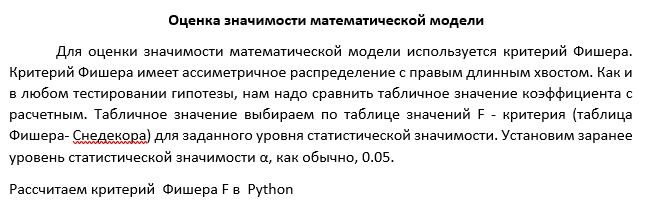

**Расчет критерия Фишера для линейной регрессии**


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Исходные данные
s = np.array([27, 37, 42, 48, 57, 56, 77, 80])  # площади квартир
p = np.array([1.2, 1.6, 1.8, 1.8, 2.5, 2.6, 3, 3.3])  # цены квартир

# Создание и обучение модели линейной регрессии
model = LinearRegression()
s_reshaped = s.reshape(-1, 1)
model.fit(s_reshaped, p)

# Получение предсказанных значений
y_pred = model.predict(s_reshaped)

# Шаг 1: Расчет степеней свободы
n = len(p)  # количество наблюдений (8)
p_params = 2  # количество параметров модели (свободный член + коэффициент)

df1 = p_params - 1  # степени свободы числителя
df2 = n - p_params  # степени свободы знаменателя

print(f"Степени свободы:")
print(f"df1 (числитель) = {df1}")
print(f"df2 (знаменатель) = {df2}")

# Шаг 2: Расчет сумм квадратов отклонений
SSf = np.sum((y_pred - np.mean(p))**2)  # факториальная (объясненная) сумма квадратов
SSo = np.sum((p - y_pred)**2)  # остаточная сумма квадратов

print(f"\nСуммы квадратов отклонений:")
print(f"SSf (фактическая) = {SSf}")
print(f"SSo (остаточная) = {SSo}")

# Шаг 3: Расчет средних квадратов отклонений
Msf = SSf / df1  # факториальный средний квадрат
Mso = SSo / df2  # остаточный средний квадрат

print(f"\nСредние квадраты отклонений:")
print(f"Msf = SSf/df1 = {SSf}/{df1} = {Msf}")
print(f"Mso = SSo/df2 = {SSo}/{df2} = {Mso}")

# Шаг 4: Расчет критерия Фишера
F = Msf / Mso

print(f"\nКритерий Фишера:")
print(f"F = Msf/Mso = {Msf}/{Mso} = {F}")

# Шаг 5: Дополнительный анализ - проверка значимости модели
from scipy.stats import f

# Уровень значимости
alpha = 0.05

# Критическое значение распределения Фишера
F_critical = f.ppf(1 - alpha, df1, df2)

print(f"\nПроверка значимости модели (α = {alpha}):")
print(f"Критическое значение F-распределения: {F_critical}")

if F > F_critical:
    print("F > Fкрит: модель статистически значима")
else:
    print("F ≤ Fкрит: модель статистически незначима")

# Шаг 6: Расчет коэффициента детерминации
R_squared = SSf / (SSf + SSo)
print(f"\nКоэффициент детерминации R² = {R_squared}")

# Шаг 7: Создание таблицы дисперсионного анализа
anova_table = pd.DataFrame({
    'Источник варьирования': ['Модель', 'Ошибка', 'Общее'],
    'Сумма квадратов': [SSf, SSo, SSf + SSo],
    'Степени свободы': [df1, df2, df1 + df2],
    'Средние квадраты': [Msf, Mso, np.nan],
    'F-критерий': [F, np.nan, np.nan]
})

print("\nТаблица дисперсионного анализа (ANOVA):")
print(anova_table)

Степени свободы:
df1 (числитель) = 1
df2 (знаменатель) = 6

Суммы квадратов отклонений:
SSf (фактическая) = 3.614987541528235
SSo (остаточная) = 0.16001245847176088

Средние квадраты отклонений:
Msf = SSf/df1 = 3.614987541528235/1 = 3.614987541528235
Mso = SSo/df2 = 0.16001245847176088/6 = 0.02666874307862681

Критерий Фишера:
F = Msf/Mso = 3.614987541528235/0.02666874307862681 = 135.55147803067638

Проверка значимости модели (α = 0.05):
Критическое значение F-распределения: 5.987377607273699
F > Fкрит: модель статистически значима

Коэффициент детерминации R² = 0.9576125937823149

Таблица дисперсионного анализа (ANOVA):
  Источник варьирования  Сумма квадратов  Степени свободы  Средние квадраты  \
0                Модель         3.614988                1          3.614988   
1                Ошибка         0.160012                6          0.026669   
2                 Общее         3.775000                7               NaN   

   F-критерий  
0  135.551478  
1         NaN  
2     

Сравним расчетное значение с табличным значением, которое можем получить либо с помощью функции f.ppf, либо с помощью таблицы значений критерия Фишера.

In [ ]:
from scipy import stats
stats.f.ppf(1 - 0.05, 1, 6)

np.float64(5.987377607273699)

Объяснение расчета критерия Фишера:
1. Степени свободы
df1 = p - 1: Степени свободы числителя, где p - количество параметров модели

df2 = n - p: Степени свободы знаменателя, где n - количество наблюдений

2. Суммы квадратов отклонений
SSf: Объясненная моделью сумма квадратов (сколько вариации объясняет модель)

SSo: Остаточная сумма квадратов (необъясненная моделью вариация)

3. Средние квадраты отклонений
Msf = SSf/df1: Факториальный средний квадрат (объясненная дисперсия)

Mso = SSo/df2: Остаточный средний квадрат (необъясненная дисперсия)

4. Критерий Фишера
F = Msf/Mso: Отношение объясненной дисперсии к необъясненной

Большее значение F указывает на лучшую объясняющую способность модели

5. Проверка значимости
Сравниваем расчетное значение F с критическим значением F-распределения

Если F > Fкрит, модель статистически значима

6. Коэффициент детерминации
R² = SSf/(SSf + SSo): Доля дисперсии, объясненная моделью

Этот анализ позволяет оценить, насколько хорошо линейная модель объясняет variation в данных и является ли эта связь статистически значимой.

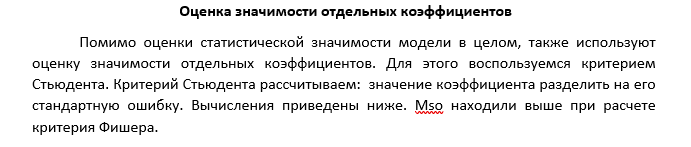

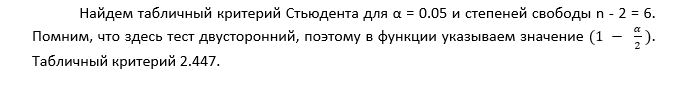

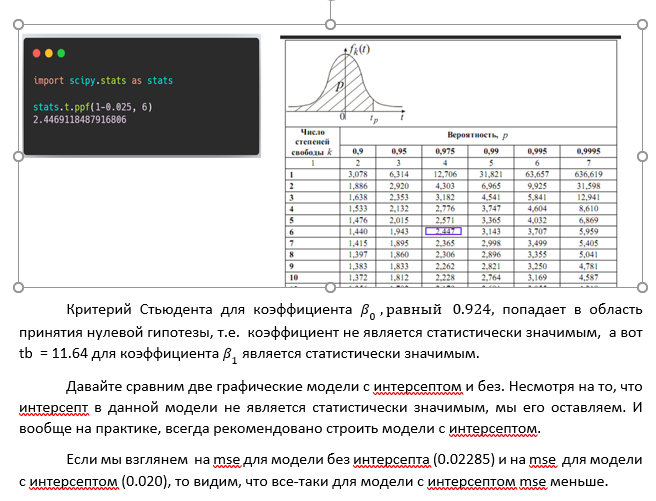

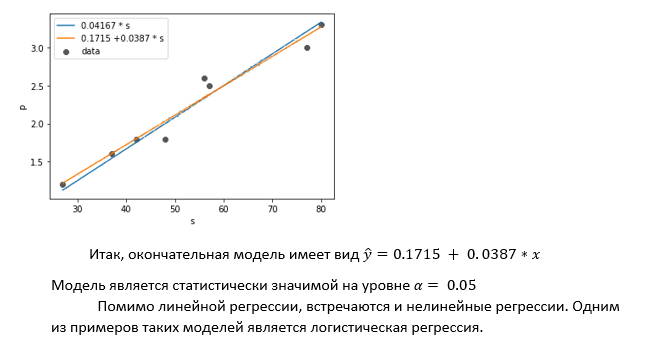

**Логистическая регрессия**

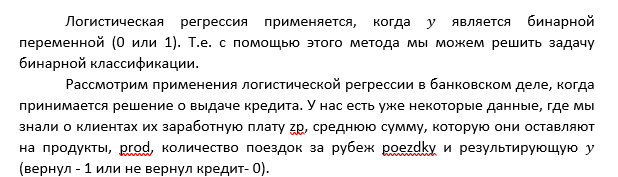

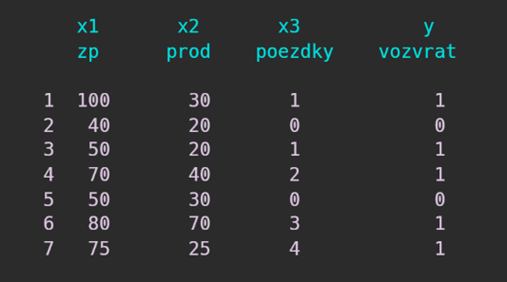

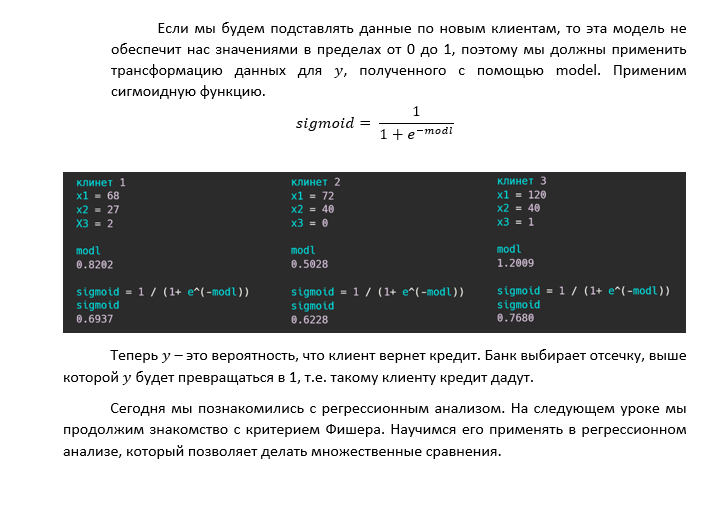

Исторические данные о клиентах:
    zp  prod  poezdky  vozvrat
0  100    30        1        1
1   40    20        0        0
2   50    20        1        1
3   70    40        2        1
4   50    30        0        0
5   80    70        3        1
6   75    25        4        1

Коэффициенты модели:
Intercept (свободный член): -24.05510
Коэффициент для zp: 0.66345
Коэффициент для prod: -0.36620
Коэффициент для poezdky: 0.18043

Данные новых клиентов:
    zp  prod  poezdky
0   68    27        2
1   72    40        0
2  120    40        1

Линейная комбинация для новых клиентов: [11.53312086  9.06545851 41.09162462]
Вероятности возврата кредита: [0.9999902  0.99988442 1.        ]

Решения о выдаче кредита (порог = 0.65):
Клиент 1: вероятность = 1.0000, решение = Выдать
Клиент 2: вероятность = 0.9999, решение = Выдать
Клиент 3: вероятность = 1.0000, решение = Выдать


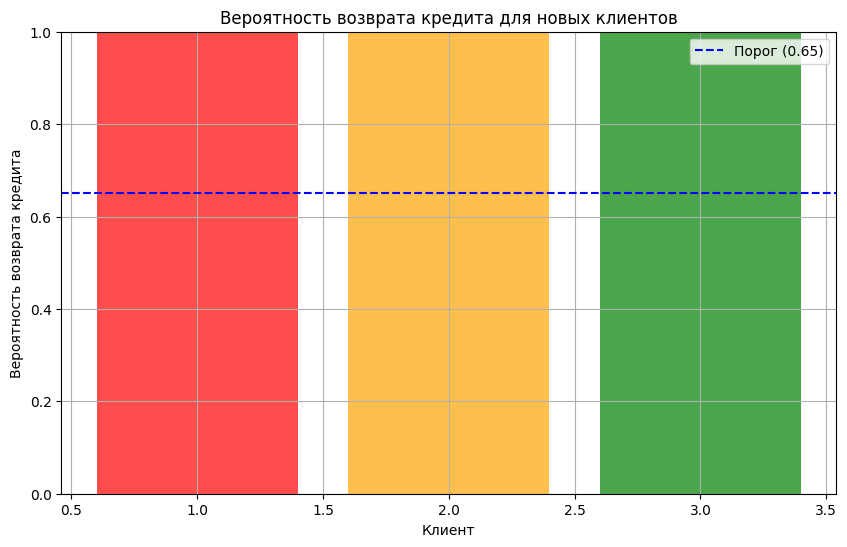


Оценка модели на исторических данных:
Матрица ошибок:
[[2 0]
 [0 5]]

Отчет о классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         5

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



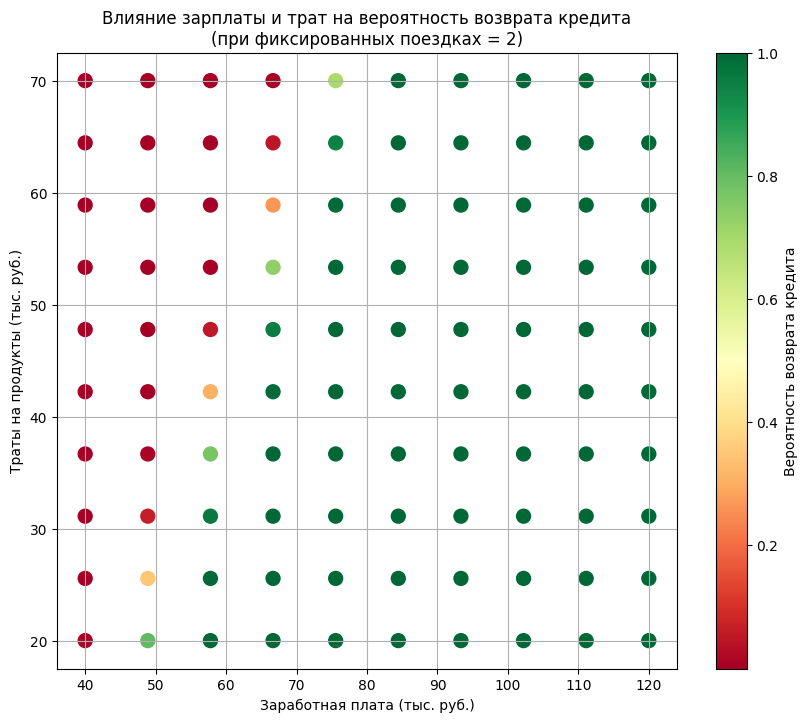

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Шаг 1: Создание датасета с историческими данными клиентов
data = {
    'zp': [100, 40, 50, 70, 50, 80, 75],  # заработная плата (тыс. руб.)
    'prod': [30, 20, 20, 40, 30, 70, 25],  # средние траты на продукты (тыс. руб.)
    'poezdky': [1, 0, 1, 2, 0, 3, 4],      # количество поездок за рубеж
    'vozvrat': [1, 0, 1, 1, 0, 1, 1]       # вернул кредит (1) или нет (0)
}

df = pd.DataFrame(data)
print("Исторические данные о клиентах:")
print(df)

# Шаг 2: Подготовка данных для обучения модели
X = df[['zp', 'prod', 'poezdky']]  # признаки
y = df['vozvrat']                  # целевая переменная

# Шаг 3: Обучение модели логистической регрессии
model = LogisticRegression()
model.fit(X, y)

# Шаг 4: Получение коэффициентов модели
coefficients = model.coef_[0]
intercept = model.intercept_[0]

print(f"\nКоэффициенты модели:")
print(f"Intercept (свободный член): {intercept:.5f}")
print(f"Коэффициент для zp: {coefficients[0]:.5f}")
print(f"Коэффициент для prod: {coefficients[1]:.5f}")
print(f"Коэффициент для poezdky: {coefficients[2]:.5f}")

# Шаг 5: Определение сигмоидной функции
def sigmoid(x):
    """Сигмоидная функция, преобразующая любое число в диапазон (0, 1)"""
    return 1 / (1 + np.exp(-x))

# Шаг 6: Применение модели к новым клиентам
new_clients = pd.DataFrame({
    'zp': [68, 72, 120],
    'prod': [27, 40, 40],
    'poezdky': [2, 0, 1]
})

print("\nДанные новых клиентов:")
print(new_clients)

# Вычисление линейной комбинации для новых клиентов
linear_combination = intercept + np.dot(new_clients, coefficients)
print(f"\nЛинейная комбинация для новых клиентов: {linear_combination}")

# Применение сигмоидной функции для получения вероятностей
probabilities = sigmoid(linear_combination)
print(f"Вероятности возврата кредита: {probabilities}")

# Шаг 7: Определение порога отсечения
threshold = 0.65  # банк устанавливает порог вероятности
decisions = (probabilities >= threshold).astype(int)

print(f"\nРешения о выдаче кредита (порог = {threshold}):")
for i, (prob, decision) in enumerate(zip(probabilities, decisions)):
    print(f"Клиент {i+1}: вероятность = {prob:.4f}, решение = {'Выдать' if decision == 1 else 'Не выдавать'}")

# Шаг 8: Визуализация вероятностей и порога
plt.figure(figsize=(10, 6))
plt.bar(range(1, 4), probabilities, color=['red', 'orange', 'green'], alpha=0.7)
plt.axhline(y=threshold, color='blue', linestyle='--', label=f'Порог ({threshold})')
plt.xlabel('Клиент')
plt.ylabel('Вероятность возврата кредита')
plt.title('Вероятность возврата кредита для новых клиентов')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

# Шаг 9: Оценка модели на исторических данных (дополнительно)
y_pred = model.predict(X)
y_pred_proba = model.predict_proba(X)[:, 1]

print("\nОценка модели на исторических данных:")
print("Матрица ошибок:")
print(confusion_matrix(y, y_pred))
print("\nОтчет о классификации:")
print(classification_report(y, y_pred))

# Шаг 10: Анализ влияния признаков на вероятность
# Создадим тепловую карту вероятностей для различных значений признаков
zp_values = np.linspace(40, 120, 10)
prod_values = np.linspace(20, 70, 10)
poezdky_value = 2  # фиксируем количество поездок

# Создаем сетку значений
grid = np.array(np.meshgrid(zp_values, prod_values, [poezdky_value])).T.reshape(-1, 3)
grid_df = pd.DataFrame(grid, columns=['zp', 'prod', 'poezdky'])

# Предсказываем вероятности
grid_proba = model.predict_proba(grid_df)[:, 1]

# Визуализируем влияние зарплаты и трат на продукты на вероятность
plt.figure(figsize=(10, 8))
scatter = plt.scatter(grid_df['zp'], grid_df['prod'], c=grid_proba, cmap='RdYlGn', s=100)
plt.colorbar(scatter, label='Вероятность возврата кредита')
plt.xlabel('Заработная плата (тыс. руб.)')
plt.ylabel('Траты на продукты (тыс. руб.)')
plt.title('Влияние зарплаты и трат на вероятность возврата кредита\n(при фиксированных поездках = 2)')
plt.grid(True)
plt.show()

Объяснение каждого шага:

**Шаг 1: Создание датасета**

Мы создаем DataFrame с историческими данными о клиентах, включая:

zp - заработная плата

prod - средние траты на продукты

poezdky - количество поездок за рубеж

vozvrat - факт возврата кредита (1 - да, 0 - нет)

**Шаг 2: Подготовка данных**

Разделяем данные на признаки (X) и целевую переменную (y)

**Шаг 3: Обучение модели**

Используем LogisticRegression из библиотеки scikit-learn

Модель обучается на исторических данных для выявления закономерностей

**Шаг 4: Получение коэффициентов**

Извлекаем коэффициенты обученной модели

Эти коэффициенты определяют влияние каждого признака на вероятность возврата кредита

**Шаг 5: Определение сигмоидной функции**

Сигмоидная функция преобразует линейную комбинацию в вероятность в диапазоне (0, 1)

Формула: sigmoid(x) = 1 / (1 + e^(-x))

**Шаг 6: Применение к новым клиентам**

Создаем DataFrame с данными новых клиентов

Вычисляем линейную комбинацию для каждого клиента

Применяем сигмоидную функцию для получения вероятностей возврата кредита

**Шаг 7: Определение порога отсечения**

Банк устанавливает пороговое значение вероятности (в данном случае 0.65)

Если вероятность выше порога - кредит выдается, иначе - нет

**Шаг 8: Визуализация**

Строим столбчатую диаграмму вероятностей для новых клиентов

Линия порога помогает визуально оценить решения

**Шаг 9: Оценка модели**

Оцениваем качество модели на исторических данных

Используем матрицу ошибок и отчет о классификации

**Шаг 10: Анализ влияния признаков**

Создаем тепловую карту, показывающую влияние зарплаты и трат на продукты на вероятность возврата кредита

Это помогает понять, как различные комбинации признаков влияют на решение

Ключевые моменты логистической регрессии:

Преобразование линейной комбинации: Логистическая регрессия сначала вычисляет линейную комбинацию признаков, а затем преобразует ее в вероятность с помощью сигмоидной функции.

Интерпретация коэффициентов:


Положительные коэффициенты увеличивают вероятность положительного исхода

Отрицательные коэффициенты уменьшают вероятность положительного исхода

Порог принятия решения: Банк может ajustить порог в зависимости от своей риск-политики:

Более высокий порог → меньше ложных положительных решений, но больше ложных отрицательных

Более низкий порог → больше одобренных кредитов, но выше риск невозврата

Оценка качества: Важно оценивать модель не только на исторических данных, но и на новых, используя кросс-валидацию или отдельную тестовую выборку.

In [ ]:
import numpy as np
import scipy.stats as stats

# Исходные данные
s = np.array([27, 37, 42, 48, 57, 56, 77, 80])  # площади квартир
p = np.array([1.2, 1.6, 1.8, 1.8, 2.5, 2.6, 3, 3.3])  # цены квартир
n = len(s)  # количество наблюдений

# Вычисление коэффициентов регрессии (предполагаем, что они уже рассчитаны)
b0 = 0.17147009966776983  # свободный член
b1 = 0.03874584717607981  # коэффициент наклона

# Предсказанные значения
y_pred = b0 + b1 * s

# Расчет остаточной суммы квадратов и Mso (остаточный средний квадрат)
SSo = np.sum((p - y_pred)**2)  # остаточная сумма квадратов
df2 = n - 2  # степени свободы для остаточной дисперсии
Mso = SSo / df2  # остаточный средний квадрат

print(f"Остаточная сумма квадратов (SSo): {SSo}")
print(f"Степени свободы (df2): {df2}")
print(f"Остаточный средний квадрат (Mso): {Mso}")

# Шаг 1: Расчет стандартных ошибок коэффициентов
# Стандартная ошибка для коэффициента b1
sum_sq_dev = np.sum((s - np.mean(s))**2)  # сумма квадратов отклонений
sb = np.sqrt(Mso / sum_sq_dev)  # стандартная ошибка для b1

# Стандартная ошибка для коэффициента b0
sum_s_sq = np.sum(s**2)  # сумма квадратов значений s
s0 = np.sqrt((Mso * sum_s_sq) / (n * sum_sq_dev))  # стандартная ошибка для b0

print(f"\nСтандартная ошибка для b1 (sb): {sb}")
print(f"Стандартная ошибка для b0 (s0): {s0}")

# Шаг 2: Расчет t-статистик для коэффициентов
tb = b1 / sb  # t-статистика для коэффициента b1
t0 = b0 / s0  # t-статистика для коэффициента b0

print(f"\nt-статистика для b1 (tb): {tb}")
print(f"t-статистика для b0 (t0): {t0}")

# Шаг 3: Определение критического значения t-распределения
alpha = 0.05  # уровень значимости
t_critical = stats.t.ppf(1 - alpha/2, df2)  # двусторонний критерий

print(f"\nКритическое значение t-распределения (α={alpha}, df={df2}): {t_critical}")

# Шаг 4: Проверка значимости коэффициентов
print(f"\nПроверка значимости коэффициентов (α={alpha}):")
if abs(tb) > t_critical:
    print(f"Коэффициент b1 статистически значим (|tb|={abs(tb):.4f} > tкрит={t_critical:.4f})")
else:
    print(f"Коэффициент b1 не значим (|tb|={abs(tb):.4f} ≤ tкрит={t_critical:.4f})")

if abs(t0) > t_critical:
    print(f"Коэффициент b0 статистически значим (|t0|={abs(t0):.4f} > tкрит={t_critical:.4f})")
else:
    print(f"Коэффициент b0 не значим (|t0|={abs(t0):.4f} ≤ tкрит={t_critical:.4f})")

# Шаг 5: Расчет p-value для коэффициентов
p_value_b1 = 2 * (1 - stats.t.cdf(abs(tb), df2))  # двусторонний p-value для b1
p_value_b0 = 2 * (1 - stats.t.cdf(abs(t0), df2))  # двусторонний p-value для b0

print(f"\np-value для коэффициента b1: {p_value_b1}")
print(f"p-value для коэффициента b0: {p_value_b0}")

# Шаг 6: Создание таблицы с результатами
results_table = f"""
Результаты анализа значимости коэффициентов регрессии:

Коэффициент | Значение | Стандартная ошибка | t-статистика | p-value   | Значим (α=0.05)
----------- | -------- | ------------------ | ------------ | --------- | ---------------
b0          | {b0:.6f}  | {s0:.6f}           | {t0:.4f}     | {p_value_b0:.6f} | {'Да' if abs(t0) > t_critical else 'Нет'}
b1          | {b1:.6f}  | {sb:.6f}           | {tb:.4f}     | {p_value_b1:.6f} | {'Да' if abs(tb) > t_critical else 'Нет'}

Критическое значение t-распределения (df={df2}, α={alpha}): {t_critical:.4f}
"""

print(results_table)

# Шаг 7: Сравнение с табличными значениями (для демонстрации)
print("Табличные значения t-распределения для различных уровней значимости:")
print("df | 0.90   | 0.95   | 0.975  | 0.99   | 0.995  | 0.9995")
print("---|--------|--------|--------|--------|--------|--------")
for df in range(1, 11):
    t_90 = stats.t.ppf(0.95, df)  # для p=0.90 (односторонний)
    t_95 = stats.t.ppf(0.975, df)  # для p=0.95 (двусторонний)
    t_975 = stats.t.ppf(0.9875, df)  # для p=0.975 (двусторонний)
    t_99 = stats.t.ppf(0.995, df)  # для p=0.99 (двусторонний)
    t_995 = stats.t.ppf(0.9975, df)  # для p=0.995 (двусторонний)
    t_9995 = stats.t.ppf(0.99975, df)  # для p=0.9995 (двусторонний)

    print(f"{df:2} | {t_90:.3f} | {t_95:.3f} | {t_975:.3f} | {t_99:.3f} | {t_995:.3f} | {t_9995:.3f}")

Остаточная сумма квадратов (SSo): 0.16001245847176077
Степени свободы (df2): 6
Остаточный средний квадрат (Mso): 0.026668743078626794

Стандартная ошибка для b1 (sb): 0.0033279211856704753
Стандартная ошибка для b0 (s0): 0.18558942531859657

t-статистика для b1 (tb): 11.642657687601966
t-статистика для b0 (t0): 0.9239217125297496

Критическое значение t-распределения (α=0.05, df=6): 2.4469118511449692

Проверка значимости коэффициентов (α=0.05):
Коэффициент b1 статистически значим (|tb|=11.6427 > tкрит=2.4469)
Коэффициент b0 не значим (|t0|=0.9239 ≤ tкрит=2.4469)

p-value для коэффициента b1: 2.4187307485989962e-05
p-value для коэффициента b0: 0.3911699480505342

Результаты анализа значимости коэффициентов регрессии:

Коэффициент | Значение | Стандартная ошибка | t-статистика | p-value   | Значим (α=0.05)
----------- | -------- | ------------------ | ------------ | --------- | ---------------
b0          | 0.171470  | 0.185589           | 0.9239     | 0.391170 | Нет
b1          | 0.038

1. ГЕНЕРАЦИЯ ДАННЫХ
Размер датасета: (100, 2)

Первые 5 строк данных:
         area          price
0  106.181018  263667.741678
1  192.607146  430729.181666
2  159.799091  370974.594191
3  139.798773  299784.011540
4   73.402796  193510.513815

Описательная статистика:
             area          price
count  100.000000     100.000000
mean   120.527112  291038.017611
std     44.623412   88240.071995
min     50.828318  149776.823160
25%     78.980114  215778.063348
50%    119.621368  284186.112771
75%    159.530468  371026.128939
max    198.033040  457793.424057

2. ВИЗУАЛИЗАЦИЯ ДАННЫХ


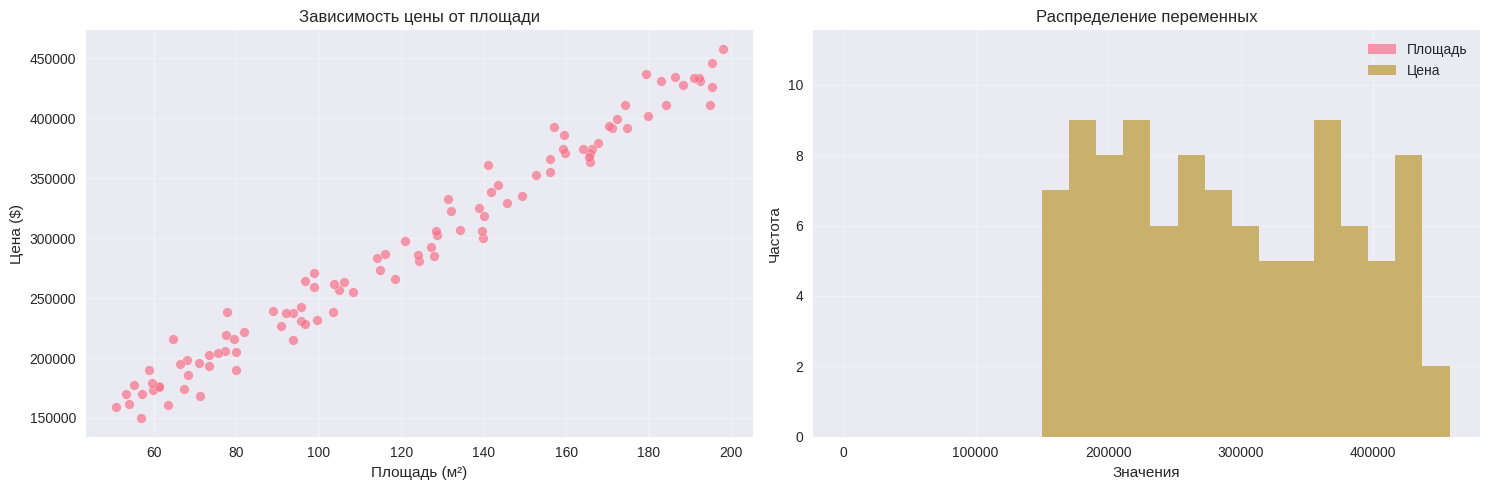


3. АНАЛИЗ КОРРЕЛЯЦИИ
Корреляция Пирсона: 0.9882
P-value: 0.0000
✅ Корреляция статистически значима

4. ПОДГОТОВКА ДАННЫХ
Обучающая выборка: 80 samples
Тестовая выборка: 20 samples

5. ОБУЧЕНИЕ МОДЕЛИ
Параметры модели:
Коэффициент (угол наклона): 1959.86
Intercept (пересечение): 54150.46

Интерпретация:
- Каждый дополнительный м² увеличивает стоимость на $1959.86
- Базовая стоимость (при площади 0 м²): $54150.46

6. ПРЕДСКАЗАНИЯ И ОЦЕНКА МОДЕЛИ
Mean Squared Error (MSE): 147082390.59
Root Mean Squared Error (RMSE): 12127.75
R² Score: 0.9825

Модель объясняет 98.3% дисперсии цен

7. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ


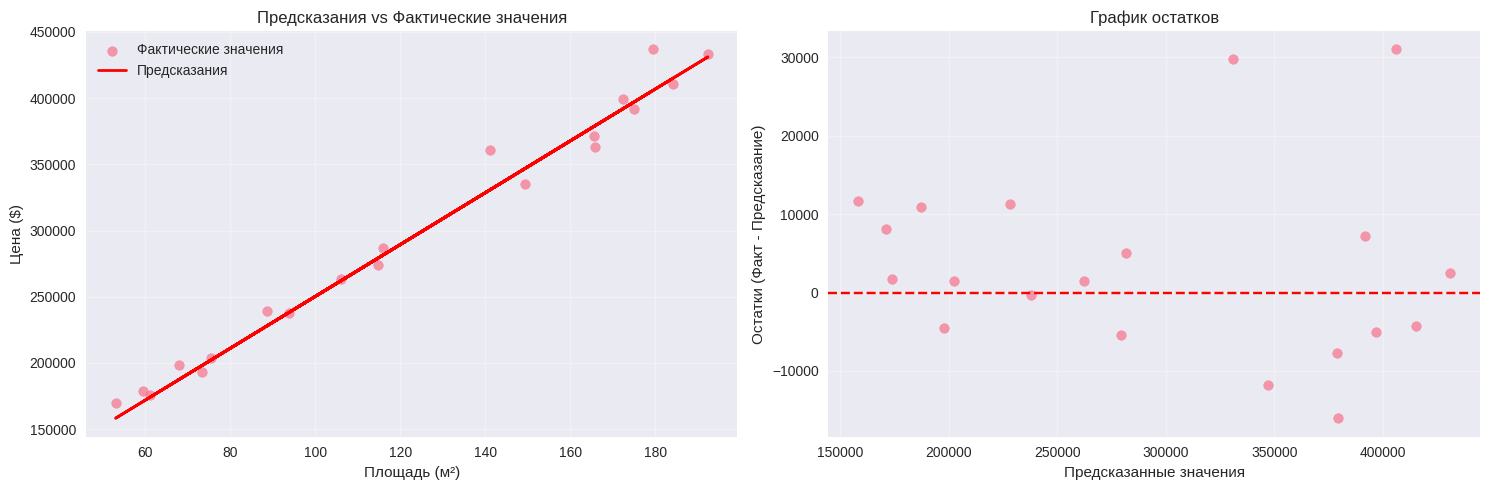


8. ПРЕДСКАЗАНИЕ ДЛЯ НОВЫХ ДОМОВ
Предсказания цен для новых домов:
Площадь 60 м² → Предсказанная цена: $171,742
Площадь 100 м² → Предсказанная цена: $250,137
Площадь 150 м² → Предсказанная цена: $348,130
Площадь 200 м² → Предсказанная цена: $446,123

9. ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ
Предсказания с 95% доверительными интервалами:
Площадь 60 м²: $171,742 (95% ДИ: $147,164 - $196,321)
Площадь 100 м²: $250,137 (95% ДИ: $225,810 - $274,464)
Площадь 150 м²: $348,130 (95% ДИ: $323,766 - $372,495)
Площадь 200 м²: $446,123 (95% ДИ: $421,333 - $470,914)

10. АНАЛИЗ ОСТАТКОВ
Тест Шапиро-Уилка на нормальность остатков: p = 0.1166
✅ Остатки распределены нормально
Тест Бартлетта на гомоскедастичность: p = 0.0000
❌ Дисперсия остатков непостоянна (гетероскедастичность)

11. ФИНАЛЬНАЯ ВИЗУАЛИЗАЦИЯ


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


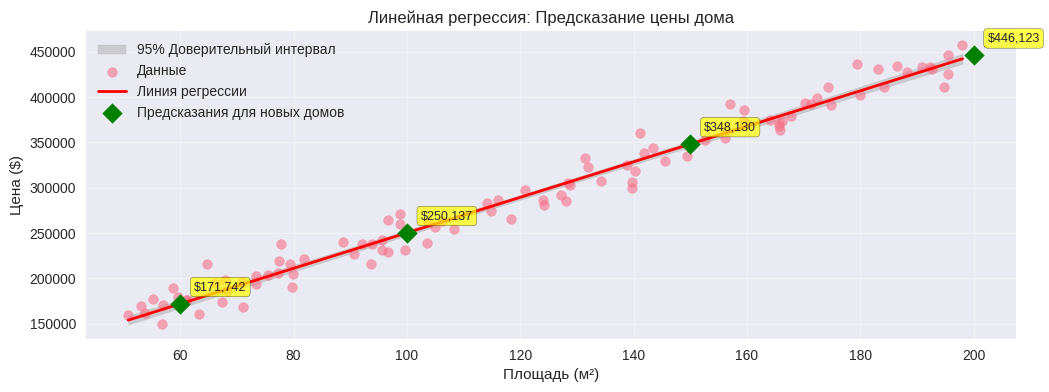


12. ЗАКЛЮЧЕНИЕ И ВЫВОДЫ
✅ МОДЕЛЬ УСПЕШНО ОБУЧЕНА!
📈 Объясненная дисперсия (R²): 98.3%
📏 Влияние площади: +$1959.86 за м²
🏠 Базовая стоимость: $54150.46
📊 Точность предсказаний: ±$12127.75 (RMSE)

Модель может использоваться для:
- Предсказания цен на дома по площади
- Анализа влияния площади на стоимость
- Сравнения фактических цен с predicted values


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Установим стиль графиков
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 1. ГЕНЕРАЦИЯ ИСКУССТВЕННЫХ ДАННЫХ
print("1. ГЕНЕРАЦИЯ ДАННЫХ")
print("=" * 50)

np.random.seed(42)  # Для воспроизводимости результатов
n_samples = 100     # Количество наблюдений

# Генерируем площадь домов (в м²) от 50 до 200 м²
area = np.random.uniform(50, 200, n_samples)

# Генерируем цену: базовая цена 50,000 + 2,000 за каждый м² + случайный шум
base_price = 50000
price_per_sqm = 2000
noise = np.random.normal(0, 15000, n_samples)  # Случайный шум

price = base_price + price_per_sqm * area + noise

# Создаем DataFrame
data = pd.DataFrame({'area': area, 'price': price})
print(f"Размер датасета: {data.shape}")
print("\nПервые 5 строк данных:")
print(data.head())
print(f"\nОписательная статистика:\n{data.describe()}")

# 2. ВИЗУАЛИЗАЦИЯ ДАННЫХ
print("\n2. ВИЗУАЛИЗАЦИЯ ДАННЫХ")
print("=" * 50)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot
axes[0].scatter(data['area'], data['price'], alpha=0.7, edgecolors='w')
axes[0].set_xlabel('Площадь (м²)')
axes[0].set_ylabel('Цена ($)')
axes[0].set_title('Зависимость цены от площади')
axes[0].grid(True, alpha=0.3)

# Гистограммы распределения
axes[1].hist(data['area'], alpha=0.7, label='Площадь', bins=15)
axes[1].hist(data['price'], alpha=0.7, label='Цена', bins=15)
axes[1].set_xlabel('Значения')
axes[1].set_ylabel('Частота')
axes[1].set_title('Распределение переменных')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. ПРОВЕРКА КОРРЕЛЯЦИИ
print("\n3. АНАЛИЗ КОРРЕЛЯЦИИ")
print("=" * 50)

# Расчет корреляции Пирсона
correlation, p_value = stats.pearsonr(data['area'], data['price'])
print(f"Корреляция Пирсона: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Корреляция статистически значима")
else:
    print("❌ Корреляция не значима")

# 4. ПОДГОТОВКА ДАННЫХ ДЛЯ МОДЕЛИ
print("\n4. ПОДГОТОВКА ДАННЫХ")
print("=" * 50)

# Разделяем на признаки (X) и целевую переменную (y)
X = data[['area']]  # Признаки (площадь)
y = data['price']   # Целевая переменная (цена)

# Разделяем на обучающую и тестовую выборки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Обучающая выборка: {X_train.shape[0]} samples")
print(f"Тестовая выборка: {X_test.shape[0]} samples")

# 5. СОЗДАНИЕ И ОБУЧЕНИЕ МОДЕЛИ
print("\n5. ОБУЧЕНИЕ МОДЕЛИ")
print("=" * 50)

# Создаем модель линейной регрессии
model = LinearRegression()

# Обучаем модель на тренировочных данных
model.fit(X_train, y_train)

# Выводим параметры модели
print("Параметры модели:")
print(f"Коэффициент (угол наклона): {model.coef_[0]:.2f}")
print(f"Intercept (пересечение): {model.intercept_:.2f}")

# Интерпретация параметров:
print("\nИнтерпретация:")
print(f"- Каждый дополнительный м² увеличивает стоимость на ${model.coef_[0]:.2f}")
print(f"- Базовая стоимость (при площади 0 м²): ${model.intercept_:.2f}")

# 6. ПРЕДСКАЗАНИЯ НА ТЕСТОВЫХ ДАННЫХ
print("\n6. ПРЕДСКАЗАНИЯ И ОЦЕНКА МОДЕЛИ")
print("=" * 50)

# Делаем предсказания на тестовых данных
y_pred = model.predict(X_test)

# Оцениваем качество модели
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Интерпретация R²
print(f"\nМодель объясняет {r2*100:.1f}% дисперсии цен")

# 7. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ
print("\n7. ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ")
print("=" * 50)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# График предсказаний vs фактические значения
axes[0].scatter(X_test, y_test, alpha=0.7, label='Фактические значения')
axes[0].plot(X_test, y_pred, color='red', linewidth=2, label='Предсказания')
axes[0].set_xlabel('Площадь (м²)')
axes[0].set_ylabel('Цена ($)')
axes[0].set_title('Предсказания vs Фактические значения')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# График остатков (residual plot)
residuals = y_test - y_pred
axes[1].scatter(y_pred, residuals, alpha=0.7)
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_xlabel('Предсказанные значения')
axes[1].set_ylabel('Остатки (Факт - Предсказание)')
axes[1].set_title('График остатков')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 8. ПРЕДСКАЗАНИЕ ДЛЯ НОВЫХ ДАННЫХ
print("\n8. ПРЕДСКАЗАНИЕ ДЛЯ НОВЫХ ДОМОВ")
print("=" * 50)

# Новые данные для предсказания
new_houses = pd.DataFrame({'area': [60, 100, 150, 200]})

# Делаем предсказания
predictions = model.predict(new_houses)

print("Предсказания цен для новых домов:")
for area, price in zip(new_houses['area'], predictions):
    print(f"Площадь {area:.0f} м² → Предсказанная цена: ${price:,.0f}")

# 9. ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ ПРЕДСКАЗАНИЙ
print("\n9. ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ")
print("=" * 50)

# Рассчитаем стандартную ошибку предсказания
n = len(X_train)
p = 1  # количество признаков
X_mean = np.mean(X_train)
S_xx = np.sum((X_train - X_mean) ** 2)

# Стандартная ошибка для индивидуального предсказания
std_error = rmse * np.sqrt(1 + 1/n + (new_houses - X_mean)**2 / S_xx)

# 95% доверительный интервал (t-распределение)
t_value = stats.t.ppf(0.975, n - p - 1)
confidence_intervals = t_value * std_error

print("Предсказания с 95% доверительными интервалами:")
for i, (area, pred) in enumerate(zip(new_houses['area'], predictions)):
    ci_low = pred - confidence_intervals.iloc[i, 0]
    ci_high = pred + confidence_intervals.iloc[i, 0]
    print(f"Площадь {area:.0f} м²: ${pred:,.0f} (95% ДИ: ${ci_low:,.0f} - ${ci_high:,.0f})")

# 10. АНАЛИЗ ОСТАТКОВ
print("\n10. АНАЛИЗ ОСТАТКОВ")
print("=" * 50)

# Проверка нормальности остатков
residuals = y_test - y_pred
_, p_value_normality = stats.shapiro(residuals)

print(f"Тест Шапиро-Уилка на нормальность остатков: p = {p_value_normality:.4f}")
if p_value_normality > 0.05:
    print("✅ Остатки распределены нормально")
else:
    print("❌ Остатки не распределены нормально")

# Проверка гомоскедастичности (постоянства дисперсии)
_, p_value_hetero = stats.bartlett(y_pred, residuals)
print(f"Тест Бартлетта на гомоскедастичность: p = {p_value_hetero:.4f}")
if p_value_hetero > 0.05:
    print("✅ Дисперсия остатков постоянна (гомоскедастичность)")
else:
    print("❌ Дисперсия остатков непостоянна (гетероскедастичность)")

# 11. ФИНАЛЬНАЯ ВИЗУАЛИЗАЦИЯ
print("\n11. ФИНАЛЬНАЯ ВИЗУАЛИЗАЦИЯ")
print("=" * 50)

plt.figure(figsize=(12, 4))

# График с доверительными интервалами
x_range = np.linspace(data['area'].min(), data['area'].max(), 100).reshape(-1, 1)
y_range_pred = model.predict(x_range)

# Правильный расчет доверительных интервалов
# Преобразуем X_mean в числовое значение
X_mean_val = float(X_mean.iloc[0]) if hasattr(X_mean, 'iloc') else float(X_mean)
S_xx_val = float(S_xx.iloc[0]) if hasattr(S_xx, 'iloc') else float(S_xx)

# Рассчитываем стандартную ошибку для предсказаний
std_err_range = rmse * np.sqrt(1/len(X_train) + (x_range - X_mean_val)**2 / S_xx_val)
ci_range = t_value * std_err_range

plt.fill_between(x_range.flatten(),
                 (y_range_pred - ci_range.flatten()),
                 (y_range_pred + ci_range.flatten()),
                 alpha=0.3, color='gray', label='95% Доверительный интервал')

plt.scatter(data['area'], data['price'], alpha=0.6, label='Данные')
plt.plot(x_range, y_range_pred, 'r-', linewidth=2, label='Линия регрессии')

# Добавляем предсказания для новых домов
new_areas = np.array([[60], [100], [150], [200]])
new_predictions = model.predict(new_areas)
plt.scatter(new_areas, new_predictions, color='green', s=100, marker='D',
           label='Предсказания для новых домов', zorder=5)

plt.xlabel('Площадь (м²)')
plt.ylabel('Цена ($)')
plt.title('Линейная регрессия: Предсказание цены дома')
plt.legend()
plt.grid(True, alpha=0.3)

# Добавляем аннотации для новых домов
for area, price in zip(new_areas.flatten(), new_predictions):
    plt.annotate(f'${price:,.0f}',
                xy=(area, price),
                xytext=(10, 10),
                textcoords='offset points',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
                fontsize=9)

plt.show()

# 12. ЗАКЛЮЧЕНИЕ И ВЫВОДЫ
print("\n12. ЗАКЛЮЧЕНИЕ И ВЫВОДЫ")
print("=" * 50)
print("✅ МОДЕЛЬ УСПЕШНО ОБУЧЕНА!")
print(f"📈 Объясненная дисперсия (R²): {r2*100:.1f}%")
print(f"📏 Влияние площади: +${model.coef_[0]:.2f} за м²")
print(f"🏠 Базовая стоимость: ${model.intercept_:.2f}")
print(f"📊 Точность предсказаний: ±${rmse:.2f} (RMSE)")
print("\nМодель может использоваться для:")
print("- Предсказания цен на дома по площади")
print("- Анализа влияния площади на стоимость")
print("- Сравнения фактических цен с predicted values")